### Title:Optimizing Ride Services Through Demand Prediction

#### Problem Statement
##### In urban areas, ride-hailing demand varies based on factors like time of day and location, impacting driver availability and passenger wait times. This project aims to develop a machine learning model to classify ride demand levels (Low, Medium, High) using features such as hour of the day and pickup location (source). By accurately predicting demand patterns, the model will help ride-hailing services optimize driver allocation, reduce wait times, and improve operational efficiency, leading to better customer satisfaction and data-driven decision-making.

#### Importing required libraries

In [1]:
import numpy as np  #Used for mathematical calculations
import pandas as pd  #used for efficiently handling structured data which is in tabular format.

In [3]:
#reading the dataset using pandas
df=pd.read_csv('rides_data.csv')

In [5]:
#used to get the list of the columns
df.columns

Index(['services', 'date', 'time', 'ride_status', 'source', 'destination',
       'duration', 'ride_id', 'distance', 'ride_charge', 'misc_charge',
       'total_fare', 'payment_method'],
      dtype='object')

In [7]:
#used to check the top values from the datset
df.head()

,services,date,time,ride_status,source,destination,duration,ride_id,distance,ride_charge,misc_charge,total_fare,payment_method
0,cab economy,2024-07-15,08:30:40.542646,completed,Balagere Harbor,Harohalli Nagar,39,RD3161218751875354,27.21,764.83,31.51,796.34,Amazon Pay
1,auto,2024-07-05,23:36:51.542646,completed,Basavanagudi 3rd Block,Bikasipura 1st Stage,89,RD8171514284594096,34.03,314.83,49.52,364.35,Paytm
2,auto,2024-07-23,11:05:37.542646,cancelled,Babusapalya Cove,Kothaguda Terrace,25,RD9376481122237926,20.24,NaN,NaN,NaN,NaN
3,cab economy,2024-06-24,08:45:10.542646,completed,Mahadevapura Mews,Kanakapura Arc,89,RD3676889143182765,31.17,484.73,15.84,500.57,QR scan
4,cab economy,2024-07-15,00:26:44.542646,completed,Ganganagar Cove,Basaveshwaranagar Colony,95,RD6639410275948084,27.21,663.50,14.13,677.63,Amazon Pay


In [9]:
#provides the dimensionn of the Dataframe
df.shape
print("No.of Rows are",df.shape[0])
print("No.of Columns are",df.shape[1])


No.of Rows are 50000
No.of Columns are 13


#### Checking is there any duplicate values

In [11]:
#checking whether there is any duplicate values.
duplicate_rows = df[df.duplicated()] 
print("\nDuplicate Rows:") 
print(duplicate_rows)


Duplicate Rows:
Empty DataFrame
Columns: [services, date, time, ride_status, source, destination, duration, ride_id, distance, ride_charge, misc_charge, total_fare, payment_method]
Index: []


#### Checking for Missing Values

In [13]:
#to count the number of null values in the dataset
df.isnull().sum()


services             0
date                 0
time                 0
ride_status          0
source               0
destination          0
duration             0
ride_id              0
distance             0
ride_charge       5036
misc_charge       5036
total_fare        5036
payment_method    5036
dtype: int64

#### Finding out is there any pattern within the missing values

In [21]:
# Check if missing values only occur for canceled rides
cancelled_rides = df[df['ride_status'] == 'cancelled'].isnull().sum()

# Check non-cancelled rides to confirm they don’t have missing values
non_cancelled_rides = df[df['ride_status'] != 'cancelled'].isnull().sum()

# Display results
print("Missing values in cancelled rides:\n", cancelled_rides)
print("\nMissing values in non-cancelled rides:\n", non_cancelled_rides)


Missing values in cancelled rides:
 services             0
date                 0
time                 0
ride_status          0
source               0
destination          0
duration             0
ride_id              0
distance             0
ride_charge       5036
misc_charge       5036
total_fare        5036
payment_method    5036
dtype: int64

Missing values in non-cancelled rides:
 services          0
date              0
time              0
ride_status       0
source            0
destination       0
duration          0
ride_id           0
distance          0
ride_charge       0
misc_charge       0
total_fare        0
payment_method    0
dtype: int64


#### Filling missing values with suitable values

In [30]:
'''Use a distinct placeholder: Instead of 0, we could fill missing values 
with something like "N/A" or "Not Applicable" for payment_method and maybe -1 
for numerical fields — making it clearer these fields don’t apply, rather than suggesting a zero value.'''
# Fill missing numerical fields with -1 and payment method with 'Not Appliable'


df['ride_charge'] = df['ride_charge'].fillna(-1)  # Handle 'ride_charge' column
df['misc_charge'] = df['misc_charge'].fillna(-1)  # Handle 'misc_charge' column
df['total_fare'] = df['total_fare'].fillna(-1)    # Handle 'total_fare' column
df['payment_method'] = df['payment_method'].fillna('Not Applicable')  # Handle 'payment_method' column


# Confirm changes
df.isnull().sum()


services          0
date              0
time              0
ride_status       0
source            0
destination       0
duration          0
ride_id           0
distance          0
ride_charge       0
misc_charge       0
total_fare        0
payment_method    0
dtype: int64

#### Handling inconsistent data formats

In [33]:
# Converting 'time' column to datetime format, handling fractional seconds
df['time'] = pd.to_datetime(df['time'], format='%H:%M:%S.%f', errors='coerce')

# Extracting hour from the 'time' column
df['hour'] = df['time'].dt.hour

# Verifying the changes
df.head()


,services,date,time,ride_status,source,destination,duration,ride_id,distance,ride_charge,misc_charge,total_fare,payment_method,hour
0,cab economy,2024-07-15,1900-01-01 08:30:40.542646,completed,Balagere Harbor,Harohalli Nagar,39,RD3161218751875354,27.21,764.83,31.51,796.34,Amazon Pay,8
1,auto,2024-07-05,1900-01-01 23:36:51.542646,completed,Basavanagudi 3rd Block,Bikasipura 1st Stage,89,RD8171514284594096,34.03,314.83,49.52,364.35,Paytm,23
2,auto,2024-07-23,1900-01-01 11:05:37.542646,cancelled,Babusapalya Cove,Kothaguda Terrace,25,RD9376481122237926,20.24,-1.00,-1.00,-1.00,Not Applicable,11
3,cab economy,2024-06-24,1900-01-01 08:45:10.542646,completed,Mahadevapura Mews,Kanakapura Arc,89,RD3676889143182765,31.17,484.73,15.84,500.57,QR scan,8
4,cab economy,2024-07-15,1900-01-01 00:26:44.542646,completed,Ganganagar Cove,Basaveshwaranagar Colony,95,RD6639410275948084,27.21,663.50,14.13,677.63,Amazon Pay,0


In [35]:
# Converting 'date' column to datetime format
df['date'] = pd.to_datetime(df['date'], errors='coerce')

# Extracting day of the week (0=Monday, 6=Sunday)
df['day_of_week'] = df['date'].dt.dayofweek

# Optionally, if you want day names instead of numbers:
df['day_name'] = df['date'].dt.day_name()

# Verifying the changes
df.head()


,services,date,time,ride_status,source,destination,duration,ride_id,distance,ride_charge,misc_charge,total_fare,payment_method,hour,day_of_week,day_name
0,cab economy,2024-07-15,1900-01-01 08:30:40.542646,completed,Balagere Harbor,Harohalli Nagar,39,RD3161218751875354,27.21,764.83,31.51,796.34,Amazon Pay,8,0,Monday
1,auto,2024-07-05,1900-01-01 23:36:51.542646,completed,Basavanagudi 3rd Block,Bikasipura 1st Stage,89,RD8171514284594096,34.03,314.83,49.52,364.35,Paytm,23,4,Friday
2,auto,2024-07-23,1900-01-01 11:05:37.542646,cancelled,Babusapalya Cove,Kothaguda Terrace,25,RD9376481122237926,20.24,-1.00,-1.00,-1.00,Not Applicable,11,1,Tuesday
3,cab economy,2024-06-24,1900-01-01 08:45:10.542646,completed,Mahadevapura Mews,Kanakapura Arc,89,RD3676889143182765,31.17,484.73,15.84,500.57,QR scan,8,0,Monday
4,cab economy,2024-07-15,1900-01-01 00:26:44.542646,completed,Ganganagar Cove,Basaveshwaranagar Colony,95,RD6639410275948084,27.21,663.50,14.13,677.63,Amazon Pay,0,0,Monday


#### Drop the columns that are not further required

In [38]:
# Drop columns that are not needed for prediction
df = df.drop(columns=['date', 'time'])

# Check remaining columns
print(df.columns)


Index(['services', 'ride_status', 'source', 'destination', 'duration',
       'ride_id', 'distance', 'ride_charge', 'misc_charge', 'total_fare',
       'payment_method', 'hour', 'day_of_week', 'day_name'],
      dtype='object')


#### Checking for Outliers through boxplot

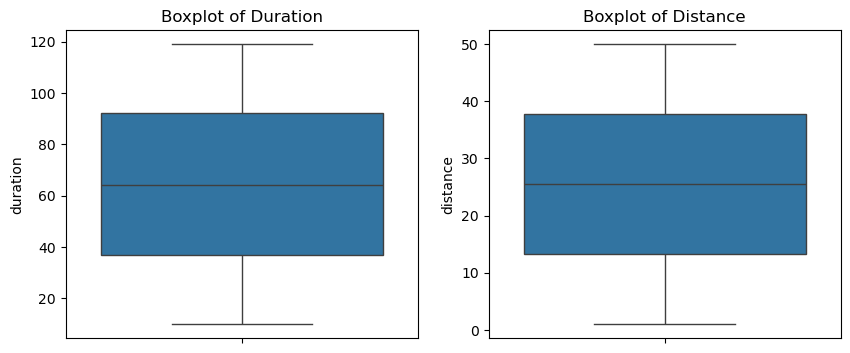

In [33]:
import matplotlib.pyplot as plt
import seaborn as sns

# Creating boxplots for duration and distance
plt.figure(figsize=(10, 4))

plt.subplot(1, 2, 1)
sns.boxplot(y=df['duration'])
plt.title("Boxplot of Duration")

plt.subplot(1, 2, 2)
sns.boxplot(y=df['distance'])
plt.title("Boxplot of Distance")
plt.show()


In [47]:
from scipy import stats

# Detect outliers using Z-score
df['z_score_duration'] = stats.zscore(df['duration'])
df['z_score_distance'] = stats.zscore(df['distance'])

# Filtering data points with Z-score > 3 or < -3
outliers_z_duration = df[(df['z_score_duration'] > 3) | (df['z_score_duration'] < -3)]
outliers_z_distance = df[(df['z_score_distance'] > 3) | (df['z_score_distance'] < -3)]

print(f"Z-score outliers in Duration: {len(outliers_z_duration)}")
print(f"Z-score outliers in Distance: {len(outliers_z_distance)}")


Z-score outliers in Duration: 0
Z-score outliers in Distance: 0


In [35]:
# Checking for outliers in 'duration'
Q1 = df['duration'].quantile(0.25)
Q3 = df['duration'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

outliers_duration = df[(df['duration'] < lower_bound) | (df['duration'] > upper_bound)]
print(f"Number of outliers in 'duration': {len(outliers_duration)}")

# Checking for outliers in 'distance'
Q1 = df['distance'].quantile(0.25)
Q3 = df['distance'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

outliers_distance = df[(df['distance'] < lower_bound) | (df['distance'] > upper_bound)]
print(f"Number of outliers in 'distance': {len(outliers_distance)}")


Number of outliers in 'duration': 0
Number of outliers in 'distance': 0


In [37]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler

# Create scalers
scaler_standard = StandardScaler()
scaler_minmax = MinMaxScaler()

# Apply scalers
df['hour_standardized'] = scaler_standard.fit_transform(df[['hour']])
df['hour_normalized'] = scaler_minmax.fit_transform(df[['hour']])

# Compare original vs scaled values
print(df[['hour', 'hour_standardized', 'hour_normalized']].head())


   hour  hour_standardized  hour_normalized
0     8          -0.506419         0.347826
1    23           1.670118         1.000000
2    11          -0.071112         0.478261
3     8          -0.506419         0.347826
4     0          -1.667239         0.000000


In [47]:
df.dtypes

services              object
ride_status           object
source                object
destination           object
duration               int64
ride_id               object
distance             float64
ride_charge          float64
misc_charge          float64
total_fare           float64
payment_method        object
hour                   int32
day_of_week            int32
day_name              object
hour_standardized    float64
hour_normalized      float64
dtype: object

In [49]:
# Checking for zero or negative values in 'duration' and 'distance' (excluding placeholder -1)
invalid_duration_count = df[(df['duration'] <= 0) & (df['duration'] != -1)].shape[0]
invalid_distance_count = df[(df['distance'] <= 0) & (df['distance'] != -1)].shape[0]

# Display the counts
print(f"Invalid 'duration' values: {invalid_duration_count}")
print(f"Invalid 'distance' values: {invalid_distance_count}")

# Removing invalid values (excluding placeholder -1 for canceled rides)
df = df[(df['duration'] > 0) | (df['duration'] == -1)]
df = df[(df['distance'] > 0) | (df['distance'] == -1)]

# Display updated shape of the dataset
print(f"Data after filtering invalid values: {df.shape}")


Invalid 'duration' values: 0
Invalid 'distance' values: 0
Data after filtering invalid values: (50000, 16)


In [51]:
# Checking unique values in 'ride_status' column
unique_statuses = df['ride_status'].unique()

# Displaying unique ride status values
print("Unique values in 'ride_status':", unique_statuses)


Unique values in 'ride_status': ['completed' 'cancelled']


In [54]:
# Grouping the data to count the number of rides per unique combination of features
df_grouped = df.groupby(['hour', 'source', ]).size().reset_index(name='ride_count')

# Display the first few rows
print(df_grouped.head(10))


   hour             source  ride_count
0     0  Adugodi 2nd Stage           1
1     0  Adugodi 4th Block           1
2     0  Adugodi 6th Block           1
3     0        Adugodi Bay           1
4     0    Adugodi Cutting           1
5     0     Adugodi Estate           1
6     0      Adugodi Nagar           1
7     0       Adugodi Park           1
8     0       Adugodi Pass           1
9     0      Adugodi Trail           1


In [56]:
df = df_grouped.copy()


In [58]:

print(df.columns)  # Check available columns


Index(['hour', 'source', 'ride_count'], dtype='object')


In [60]:
print(df_grouped.columns)  # What are the actual column names?
print(df.columns)  # Does 'hour' and 'source' exist in the original DataFrame?
print(df_grouped.head())  # Show the first few rows


Index(['hour', 'source', 'ride_count'], dtype='object')
Index(['hour', 'source', 'ride_count'], dtype='object')
   hour             source  ride_count
0     0  Adugodi 2nd Stage           1
1     0  Adugodi 4th Block           1
2     0  Adugodi 6th Block           1
3     0        Adugodi Bay           1
4     0    Adugodi Cutting           1


In [62]:
print(df['ride_count'].describe())
print(df['ride_count'].value_counts().head(10))  # See the most common values


count    46163.000000
mean         1.083119
std          0.292597
min          1.000000
25%          1.000000
50%          1.000000
75%          1.000000
max          4.000000
Name: ride_count, dtype: float64
ride_count
1    42534
2     3430
3      190
4        9
Name: count, dtype: int64


In [64]:
# Creating demand levels based on ride_count
def categorize_demand(count):
    if count == 1:
        return 'Low'
    elif count == 2:
        return 'Medium'
    else:
        return 'High'

# Apply the function to create a new column
df['demand_level'] = df['ride_count'].apply(categorize_demand)

# Checking the distribution of demand levels
print(df['demand_level'].value_counts())


demand_level
Low       42534
Medium     3430
High        199
Name: count, dtype: int64


In [67]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder

# Selecting features and target
X = df[['hour', 'source']]  # Features
y = df['demand_level']      # Target variable

# One-hot encoding for 'source'
encoder = OneHotEncoder(handle_unknown='ignore', sparse_output=False)
X_encoded = encoder.fit_transform(df[['source']])

# Convert encoded features to DataFrame
X_encoded_df = pd.DataFrame(X_encoded, columns=encoder.get_feature_names_out(['source']))

# Concatenate encoded features with 'hour'
X_final = pd.concat([df[['hour']], X_encoded_df], axis=1)

# Splitting into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X_final, y, test_size=0.2, random_state=42, stratify=y)

# Display dataset shapes
print(f"Training data shape: {X_train.shape}")
print(f"Testing data shape: {X_test.shape}")


Training data shape: (36930, 12983)
Testing data shape: (9233, 12983)
